**Import all the necessaty libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Variables of the dataset**


1. pclass -- Ticket class -- {1 - "1st-class", 2 - "2nd-class", 3 - "3rd-class"}
2. Survived -- Survival -- {1 - yes, 0 -- No}
3. name
4. sex -- {female, male}
5. age
6. sibsp -- # of siblings / spouse aboard the titanic
7. parch -- # of parents / children aboard the titanic
8. ticket
9. fare -- Passenger fare
10.  cabin -- Cabin number
11. embarked -- Port of embarkation -- {C = Cherbourg, Q = Queenstown, S = southamptom}
12. boat -- lifeboat
13. Body -- Body identification number 
14. home.dest -- Home destination


In [2]:
df = pd.read_csv("titanic3.csv")
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Looking the dataset, there are variable that are not neccesary for a postprocessing:
* name
* ticket
* cabin
* boat
* body
* home.dest

In [15]:
data = df.loc[:, ["pclass", "survived", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
print(data.head(10))
print("The shape of the dataset is: {}".format(data.shape))

   pclass  survived     sex      age  sibsp  parch      fare embarked
0       1         1  female  29.0000      0      0  211.3375        S
1       1         1    male   0.9167      1      2  151.5500        S
2       1         0  female   2.0000      1      2  151.5500        S
3       1         0    male  30.0000      1      2  151.5500        S
4       1         0  female  25.0000      1      2  151.5500        S
5       1         1    male  48.0000      0      0   26.5500        S
6       1         1  female  63.0000      1      0   77.9583        S
7       1         0    male  39.0000      0      0    0.0000        S
8       1         1  female  53.0000      2      0   51.4792        S
9       1         0    male  71.0000      0      0   49.5042        C
The shape of the dataset is: (1309, 8)


In [16]:
data.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


**Calculate the replace & change the values**

Replace by mean
* age  - continuous data
* fare - continuous data

Replace by frecuency
* embarked - categorical data

In [18]:
#Variable age
avg_age = data["age"].astype("float").mean(axis = 0)
print("The average of date: {}".format(avg_age))

data["age"].replace(np.nan, avg_age, inplace = True)

The average of date: 29.8811345124283


In [19]:
#Variable fare
avg_fare = data["fare"].astype("float").mean(axis = 0)
print("The average of fare: {}".format(avg_fare))

data["fare"].replace(np.nan, avg_fare, inplace = True)

The average of fare: 33.29547928134572


In [20]:
data["embarked"].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [23]:
#Varialbe embarked
type_embarked = data["embarked"].value_counts().idxmax()
print("The most common type of embarked is: {}".format(type_embarked))

data["embarked"].replace(np.nan, type_embarked, inplace = True)

The most common type of embarked is: S


In [25]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [26]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [27]:
data.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558477
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244208
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171521
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160224
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221522
fare,-0.558477,0.244208,0.171521,0.160224,0.221522,1.000000


*Comparision between:*   **Gender (Female / male) -- Survived**

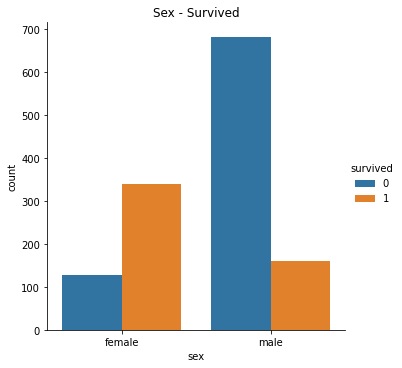

In [46]:
ax1 = sns.catplot(x = "sex", hue = "survived", kind = "count", data = data)
ax1.set(title = "Sex - Survived")

*Comparision:* **Type of class -- Survived**

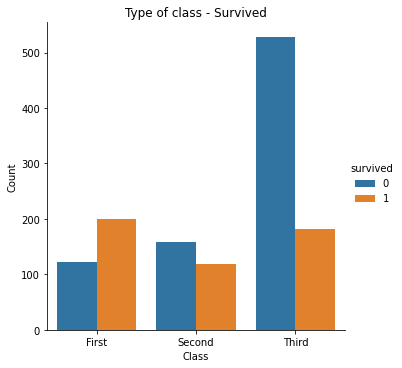

In [49]:
ax2 = sns.catplot(x = "pclass", hue = "survived", kind = "count", data = data)
ax2.set(title = "Type of class - Survived")
ax2.set_xticklabels(['First', 'Second', 'Third'])
ax2.set_axis_labels("Class", "Count")

*Comparision:* **Embarked zone -- Survived**

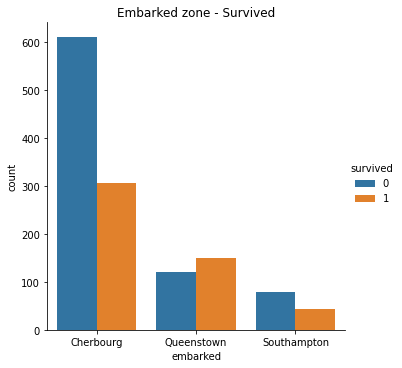

In [44]:
ax3 = sns.catplot(x = "embarked", hue = "survived", kind = "count", data = data)
ax3.set(title = "Embarked zone - Survived")
ax3.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])

*Comparision:* **Age & Sex -- Survived**

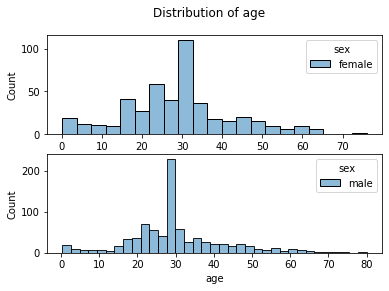

In [130]:
data_female = data[data["sex"] == "female"][["survived", "age", "sex", "fare", "pclass", "embarked"]]
data_male = data[data["sex"] == "male"][["survived", "age", "sex", "fare", "pclass", "embarked"]]

fig4, ax4 = plt.subplots(2)
fig4.suptitle('Distribution of age')
sns.histplot(x = "age", hue = "sex", data = data_female, ax = ax4[0])
sns.histplot(x = "age", hue = "sex", data = data_male, ax = ax4[1])

[Text(0.5, 1.0, 'Distribution of age between gender and survived')]

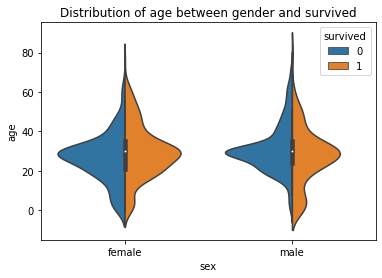

In [127]:
ax5 = sns.violinplot(x = "sex", y = "age", hue = "survived", data = data, split = True)
ax5.set(title = "Distribution of age between gender and survived")

In [128]:
data["family_size"] = 0
data["family_size"] = data["sibsp"] + data["parch"]

data["alone"] = 0
data.loc[data["family_size"] == 0, "alone"] = 1
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size,alone,fare_ranges
0,1,1,female,29.0000,0,0,211.3375,S,0,1,"(26.0, 512.329]"
1,1,1,male,0.9167,1,2,151.5500,S,3,0,"(26.0, 512.329]"
2,1,0,female,2.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
3,1,0,male,30.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
4,1,0,female,25.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"


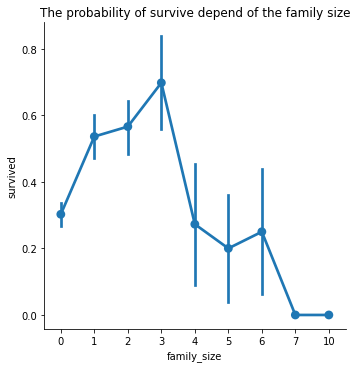

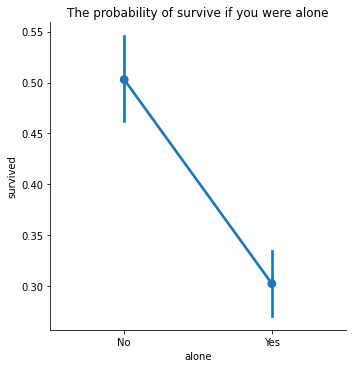

In [91]:
ax6 = sns.catplot(x = "family_size", y = "survived", kind = "point", data = data)
ax6.set(title = "The probability of survive depend of the family size")
ax7 = sns.catplot(x = "alone", y = "survived", kind = "point", data = data)
ax7.set(title = "The probability of survive if you were alone")
ax7.set_xticklabels(["No", "Yes"])

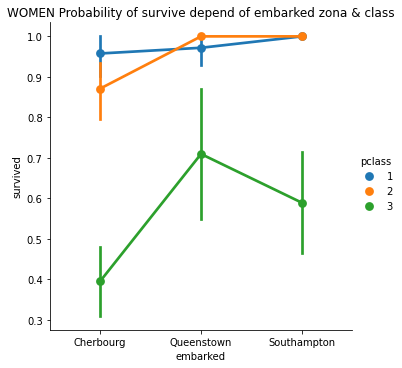

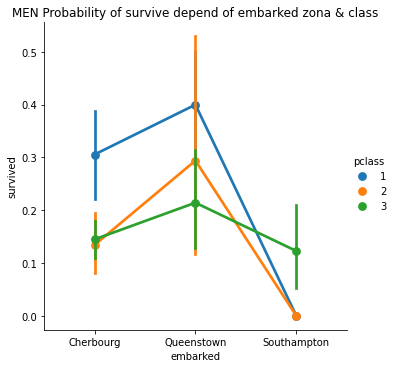

In [137]:
#WOMEN
ax8 = sns.catplot(x = "embarked", y = "survived", hue = "pclass",  kind = "point", data = data_female)
ax8.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax8.set(title = "WOMEN Probability of survive depend of embarked zona & class")

#MEN
ax8 = sns.catplot(x = "embarked", y = "survived", hue = "pclass",  kind = "point", data = data_male)
ax8.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax8.set(title = "MEN Probability of survive depend of embarked zona & class")

The ranges of fare are divided into three clasess: 
(-0.001, 8.662]    454
(8.662, 26.0]      428
(26.0, 512.329]    426
Name: fare_ranges, dtype: int64


[Text(0, 0, 'Third Class'),
 Text(0, 0, 'Second Class'),
 Text(0, 0, 'First Class')]

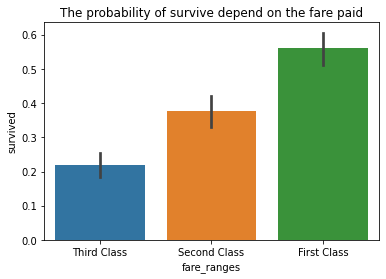

In [118]:
data["fare_ranges"] = pd.qcut(df["fare"], 3)
print("The ranges of fare are divided into three clasess: \n{}".format(data["fare_ranges"].value_counts()))
ax9 = sns.barplot(x = "fare_ranges", y = "survived", data = data)
ax9.set(title = "The probability of survive depend on the fare paid")
ax9.set_xticklabels(["Third Class", "Second Class", "First Class"])

In [138]:
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size,alone,fare_ranges
0,1,1,female,29.0000,0,0,211.3375,S,0,1,"(26.0, 512.329]"
1,1,1,male,0.9167,1,2,151.5500,S,3,0,"(26.0, 512.329]"
2,1,0,female,2.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
3,1,0,male,30.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
4,1,0,female,25.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"


In [139]:
gender = {"female":0, "male":1}
data["sex"] = data["sex"].map(gender)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size,alone,fare_ranges
0,1,1,0,29.0000,0,0,211.3375,S,0,1,"(26.0, 512.329]"
1,1,1,1,0.9167,1,2,151.5500,S,3,0,"(26.0, 512.329]"
2,1,0,0,2.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
3,1,0,1,30.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"
4,1,0,0,25.0000,1,2,151.5500,S,3,0,"(26.0, 512.329]"


In [140]:
data["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [141]:
zone_embarked = {"S":0, "C":1, "Q":2}
data["embarked"] = data["embarked"].map(zone_embarked)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size,alone,fare_ranges
0,1,1,0,29.0000,0,0,211.3375,0,0,1,"(26.0, 512.329]"
1,1,1,1,0.9167,1,2,151.5500,0,3,0,"(26.0, 512.329]"
2,1,0,0,2.0000,1,2,151.5500,0,3,0,"(26.0, 512.329]"
3,1,0,1,30.0000,1,2,151.5500,0,3,0,"(26.0, 512.329]"
4,1,0,0,25.0000,1,2,151.5500,0,3,0,"(26.0, 512.329]"


In [142]:
data = data.drop("fare_ranges", axis = 1)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,family_size,alone
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,3,0
2,1,0,0,2.0000,1,2,151.5500,0,3,0
3,1,0,1,30.0000,1,2,151.5500,0,3,0
4,1,0,0,25.0000,1,2,151.5500,0,3,0


In [143]:
data.to_csv("TITANIC.csv", index = False)